In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualização de Dados


### Titanic


In [2]:
data = pd.read_csv('titanic/train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data['Cabin'] = data['Cabin'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

In [5]:
data['Cabin'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

### Matplotlib


In [6]:
%matplotlib inline

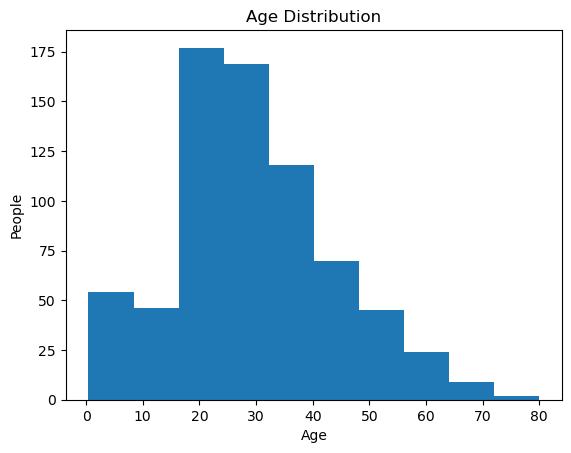

In [7]:
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')
plt.ylabel('People')
plt.xlabel('Age')
plt.show()

In [8]:
data['Pclass'].unique()

array([3, 1, 2])

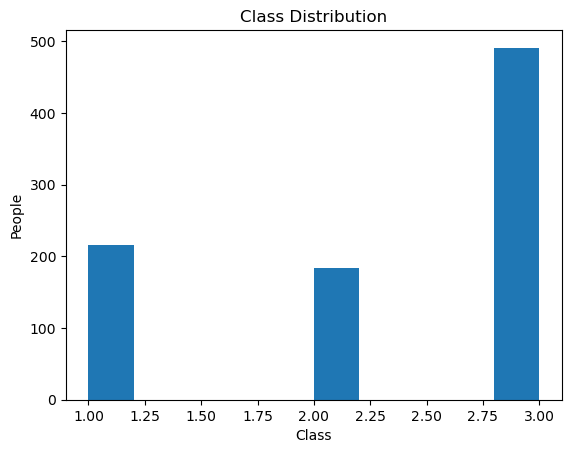

In [9]:
plt.hist(data['Pclass'])
plt.title('Class Distribution')
plt.ylabel('People')
plt.xlabel('Class')
plt.show()

### Subplots - 1ª Forma


<function matplotlib.pyplot.show(close=None, block=None)>

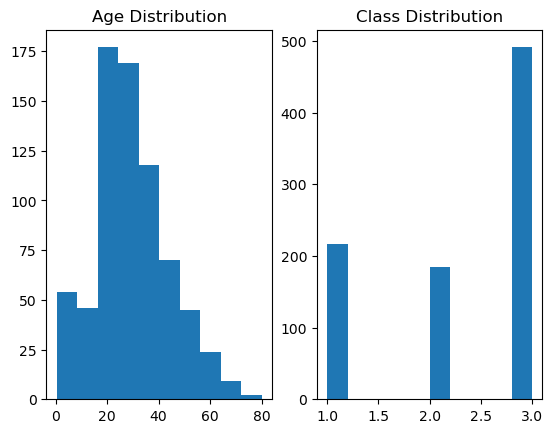

In [10]:
plt.subplot(1, 2, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.show

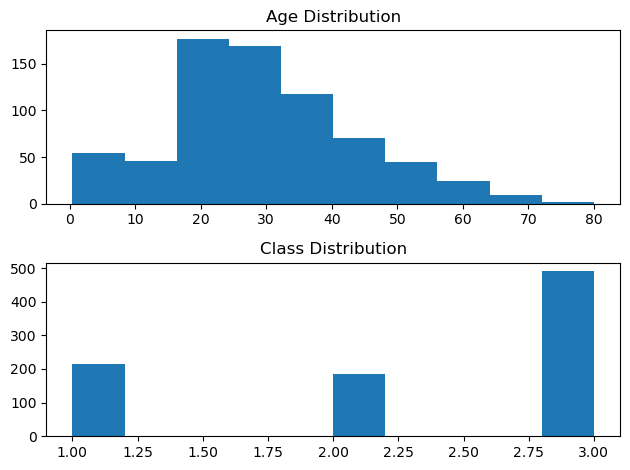

In [11]:
plt.subplot(2, 1, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

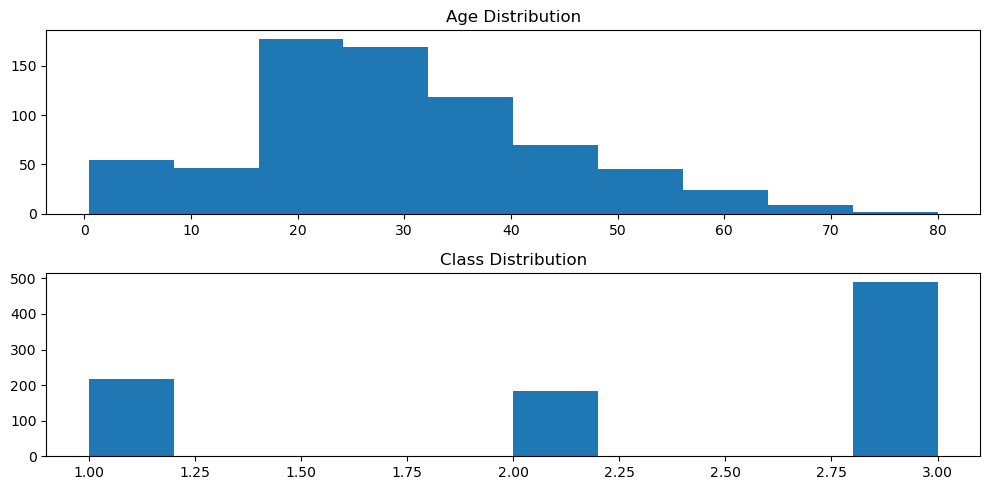

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.hist(data['Age'].dropna())
plt.title('Age Distribution')

plt.subplot(2, 1, 2)
plt.hist(data['Pclass'])
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

### Subplots - 2ª Forma


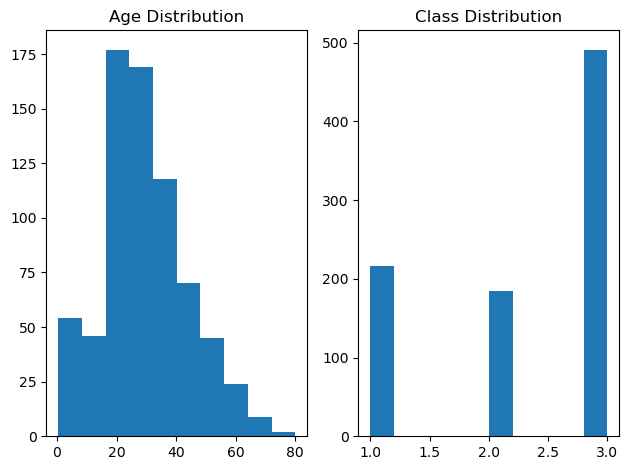

In [13]:
f, ax = plt.subplots(1, 2)
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

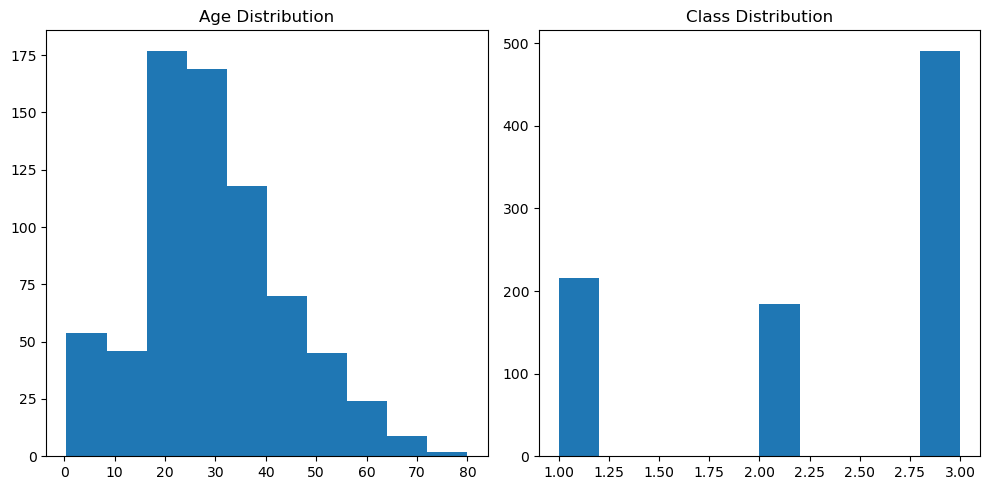

In [14]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

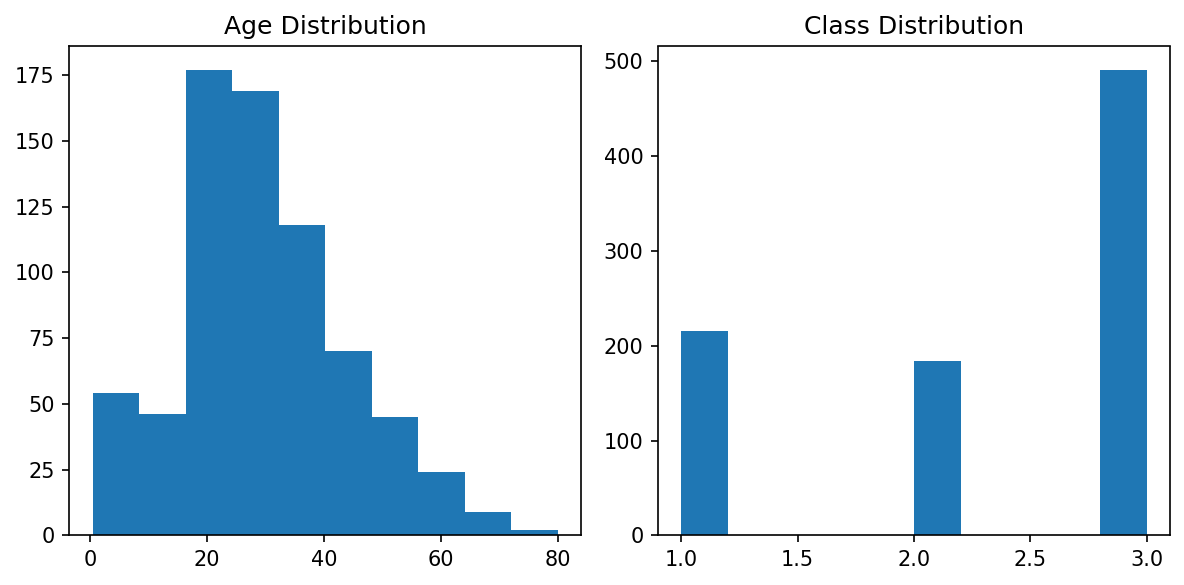

In [15]:
f, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
ax[0].hist(data['Age'].dropna())
ax[0].set_title('Age Distribution')

ax[1].hist(data['Pclass'])
ax[1].set_title('Class Distribution')


plt.tight_layout()
plt.show()

### Seaborn


In [16]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [18]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### pie e countplot


<Axes: xlabel='Sex', ylabel='count'>

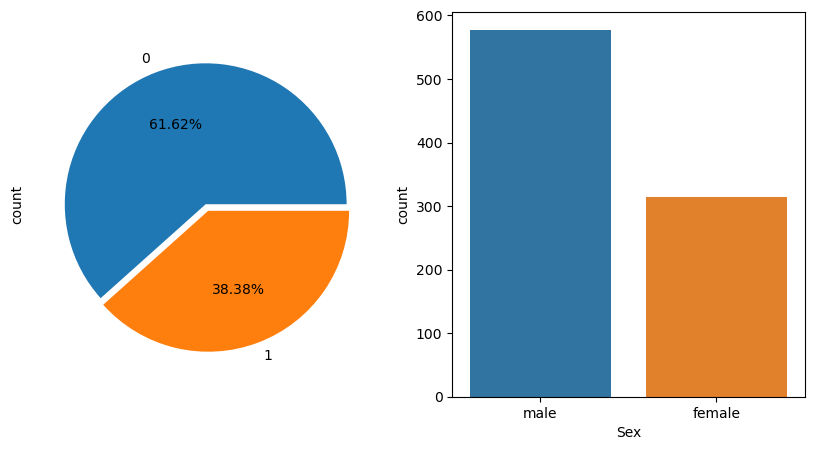

In [19]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Survived'].value_counts().plot.pie(
    ax=ax[0], explode=[0, 0.05], autopct='%0.2f%%')  # type:ignore

sns.countplot(data, x='Sex', ax=ax[1], hue='Sex')

### countplot e hue


<Axes: xlabel='Sex', ylabel='count'>

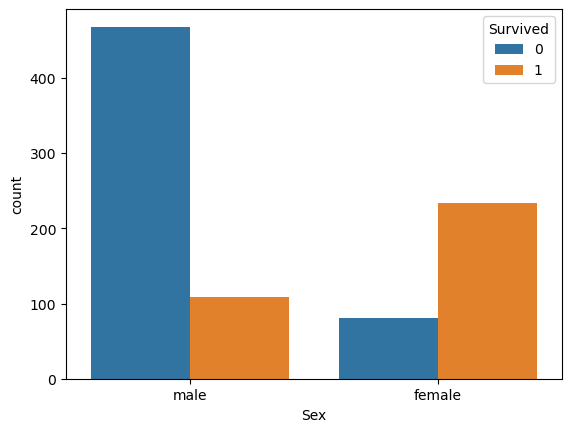

In [22]:
sns.countplot(data, x='Sex', hue='Survived')

### boxplot


<Axes: xlabel='Pclass', ylabel='Age'>

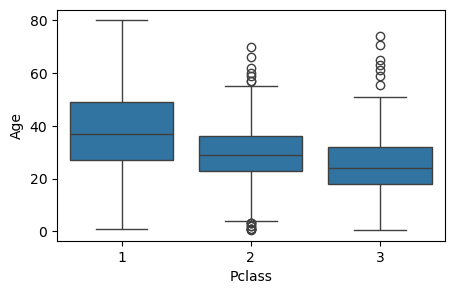

In [27]:
plt.figure(figsize=(5, 3), dpi=100)
sns.boxplot(x='Pclass', y='Age', data=data)

<Axes: xlabel='Pclass', ylabel='Age'>

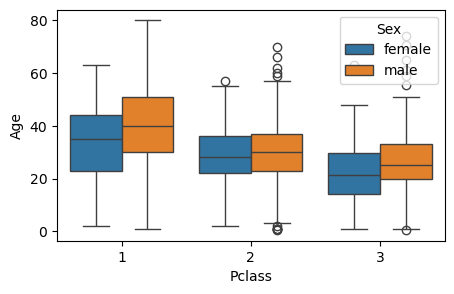

In [28]:
plt.figure(figsize=(5, 3), dpi=100)
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=data)

### violinplot


<Axes: xlabel='Pclass', ylabel='Age'>

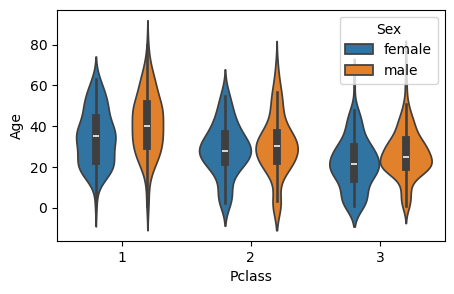

In [29]:
plt.figure(figsize=(5, 3), dpi=100)
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=data)

### FacetGrid com hist


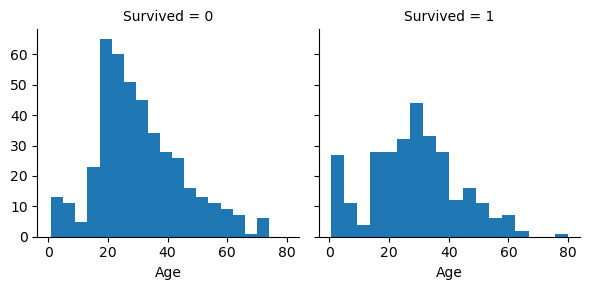

In [32]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=18)

### FacetGrid com barplot


In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


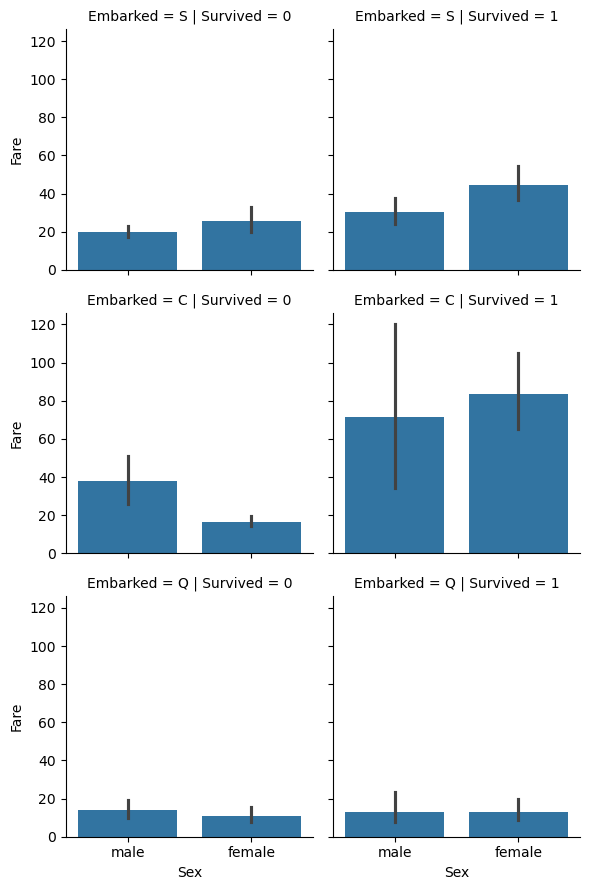

In [41]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare')

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


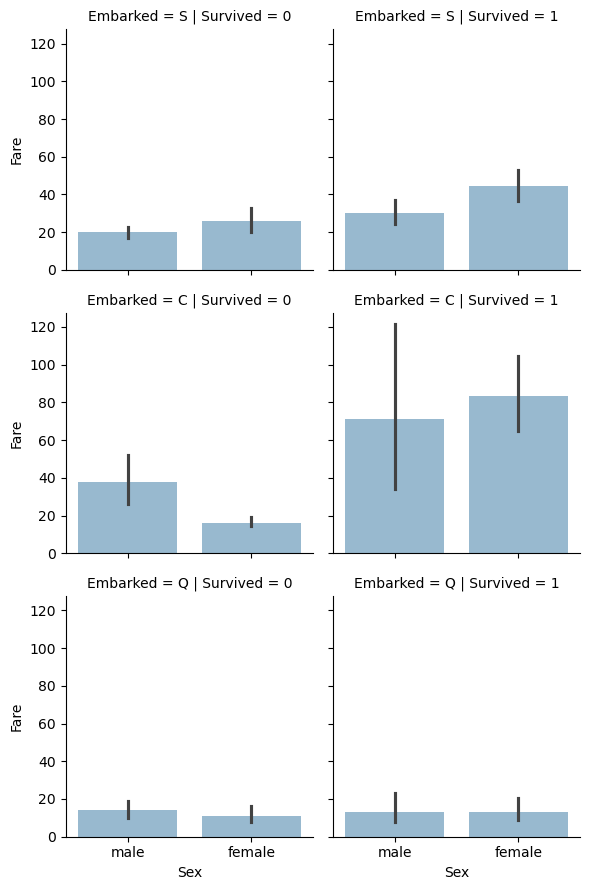

In [45]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.5)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


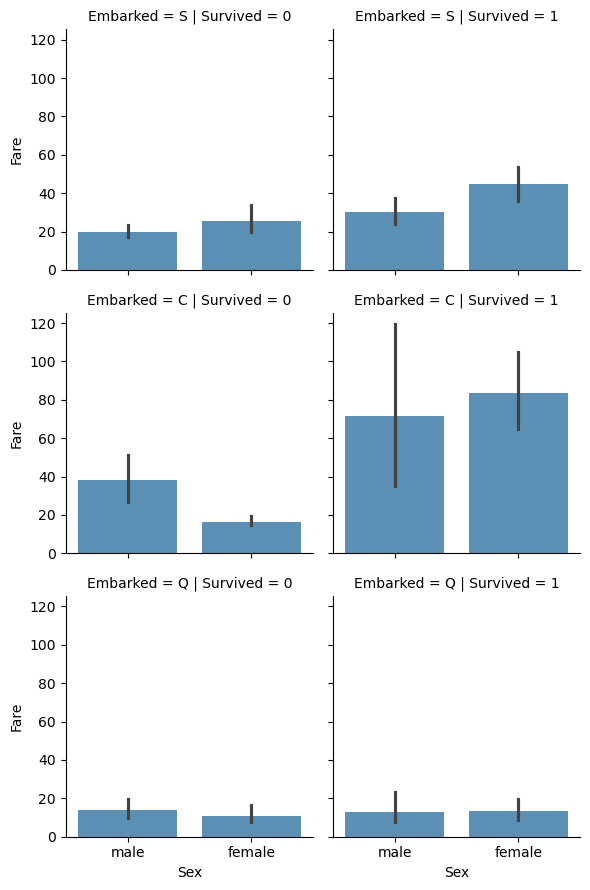

In [47]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.8)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


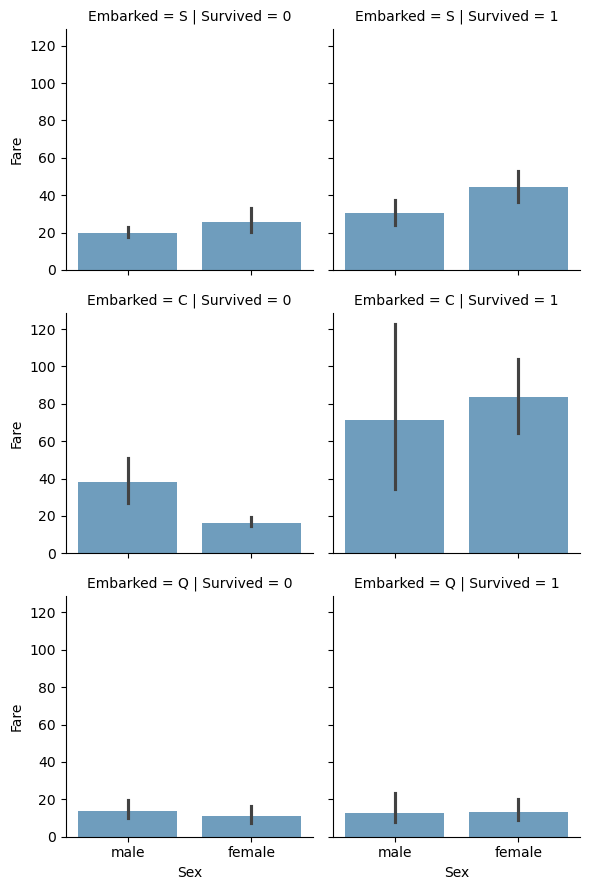

In [54]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.7, errorbar=('ci', 95))

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


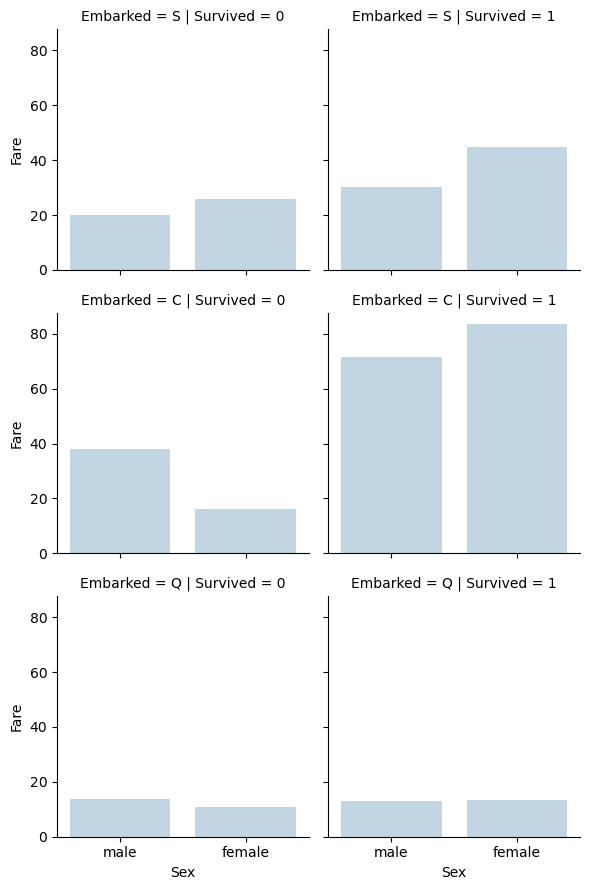

In [57]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.3, errorbar=None)

/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


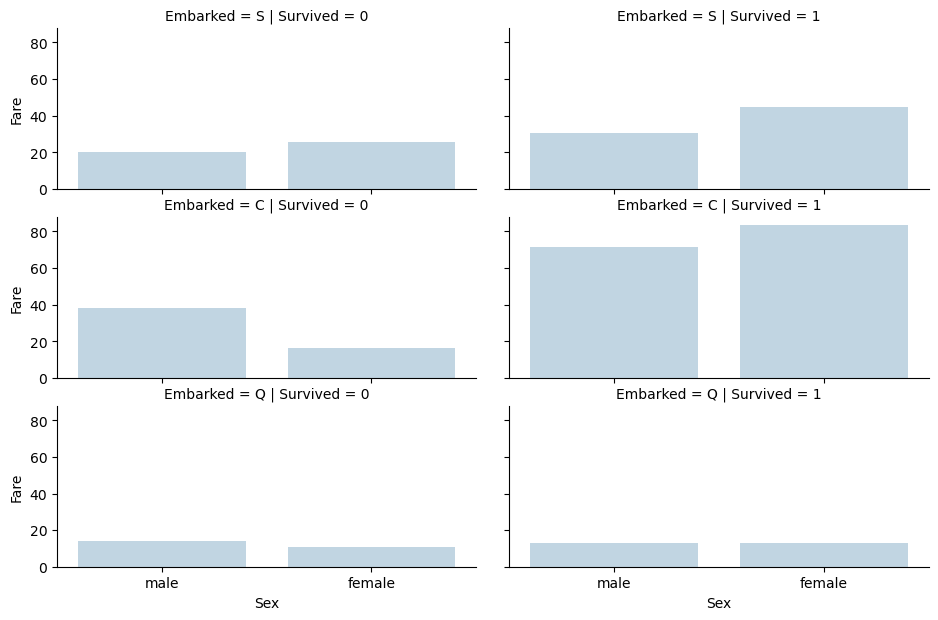

In [58]:
g = sns.FacetGrid(data, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', alpha=0.3, errorbar=None)

fig = plt.gcf()
fig.set_size_inches(10, 6)

### FacetGrid com distplot


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63

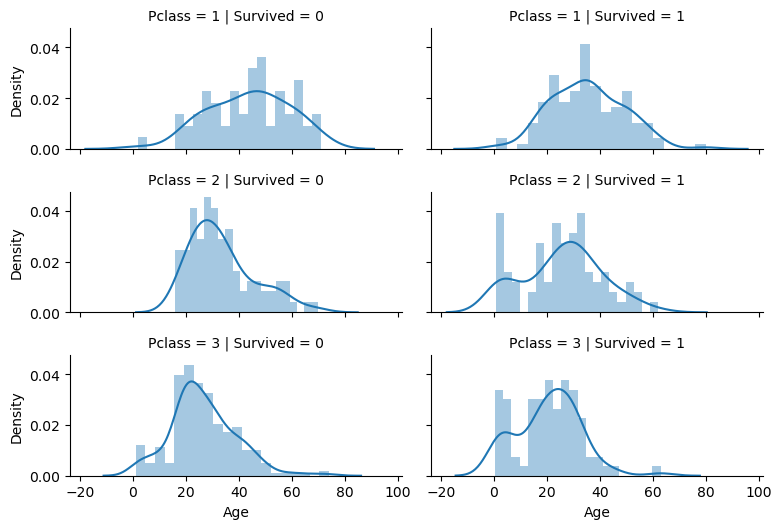

In [75]:
g = sns.FacetGrid(data, col='Survived', row='Pclass', height=1.8, aspect=2.2)
g.map(sns.distplot, 'Age', bins=20)

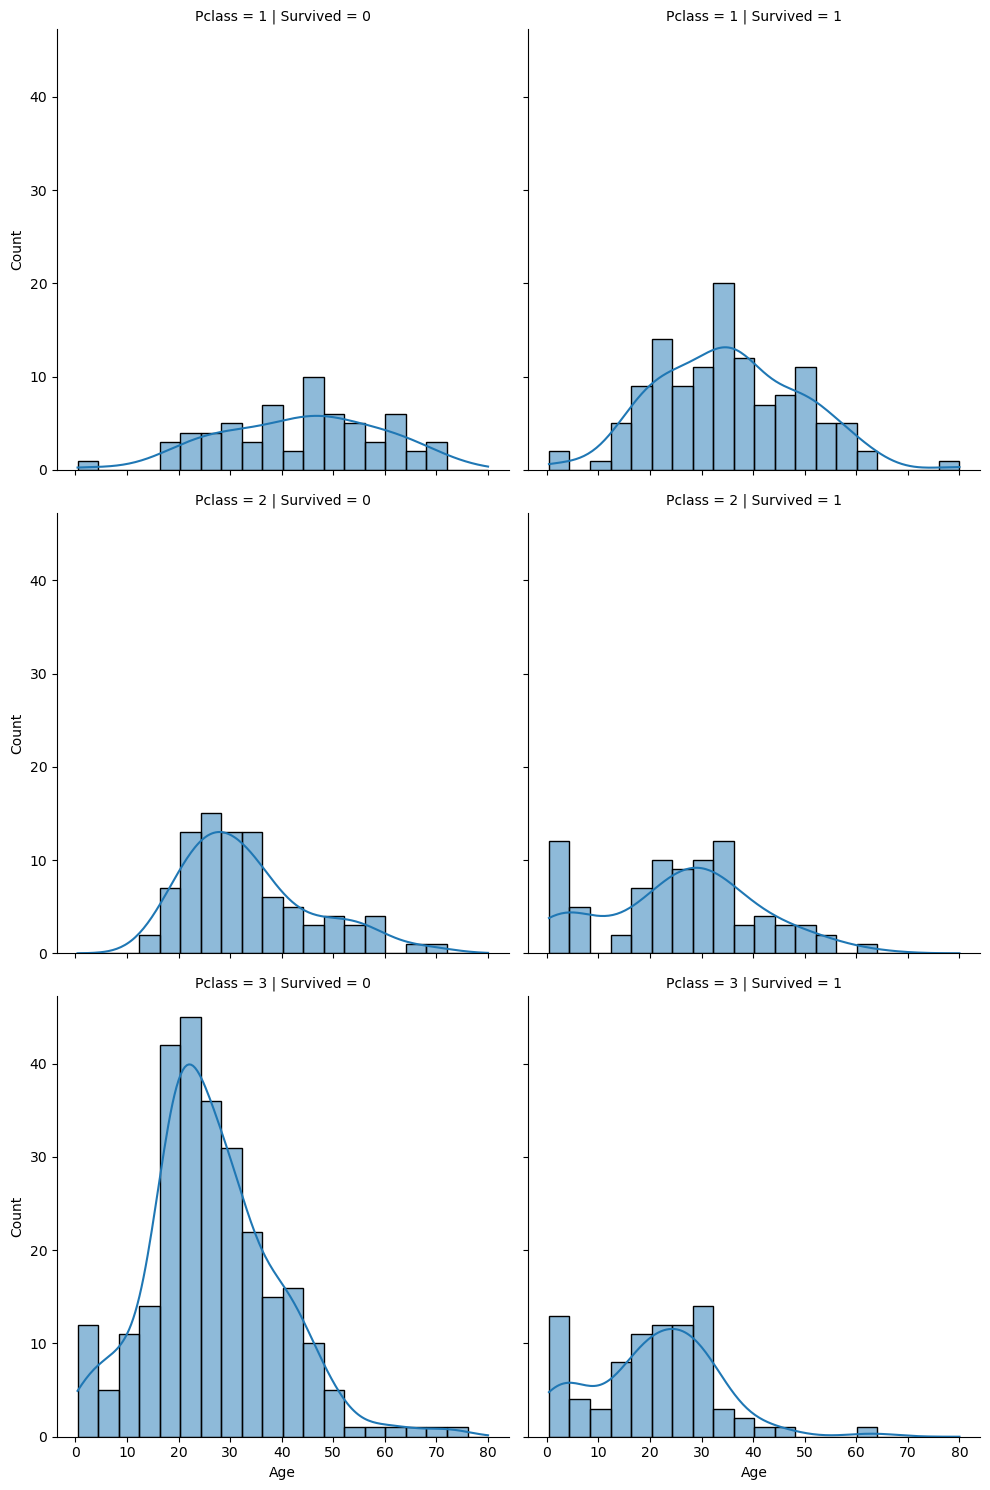

In [74]:
sns.displot(data=data, col='Survived', row='Pclass', x='Age', kde=True)

### catplot do tipo "point"


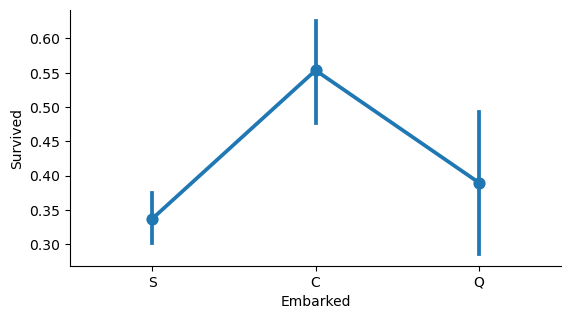

In [78]:
sns.catplot(x="Embarked", y="Survived", data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(6, 3)

### FacetGrid com pointplot


/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/gabrielrstan/anaconda3/envs/curso_data_science/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


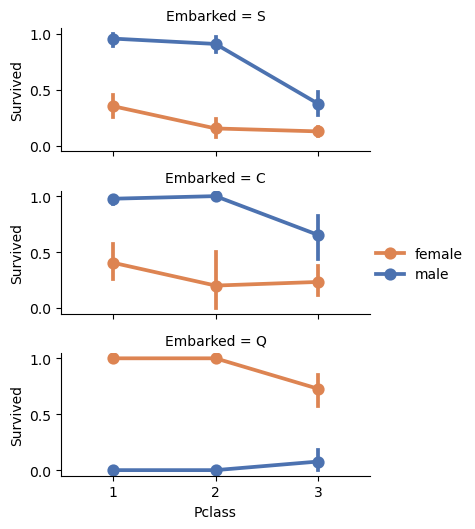

In [83]:
g = sns.FacetGrid(data, row='Embarked', height=1.8, aspect=2.2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

### heatmap


In [85]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

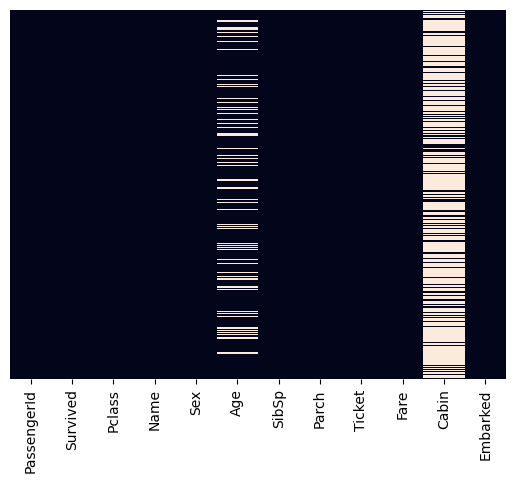

In [89]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

<Axes: >

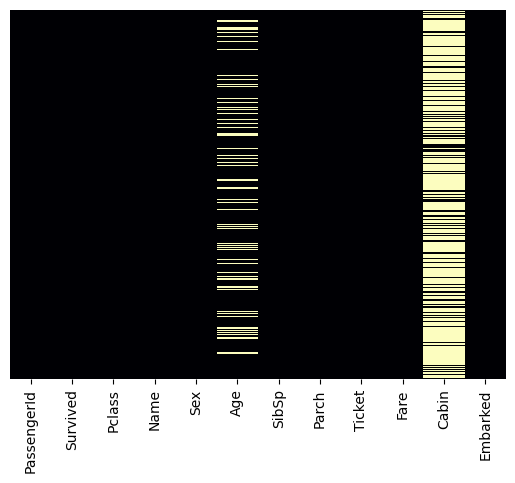

In [90]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='magma')

### relplot


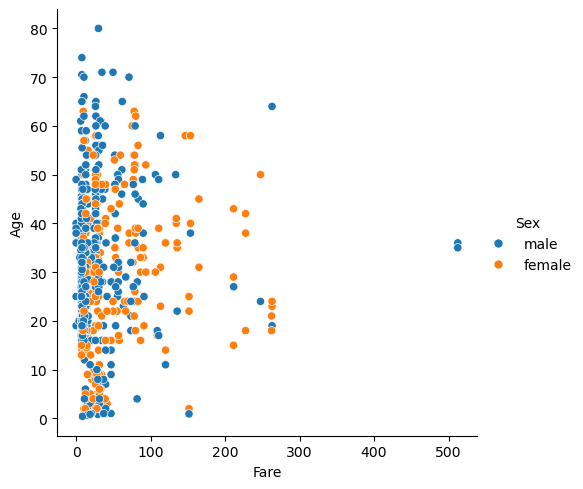

In [92]:
sns.relplot(x='Fare', y='Age', hue='Sex', data=data)

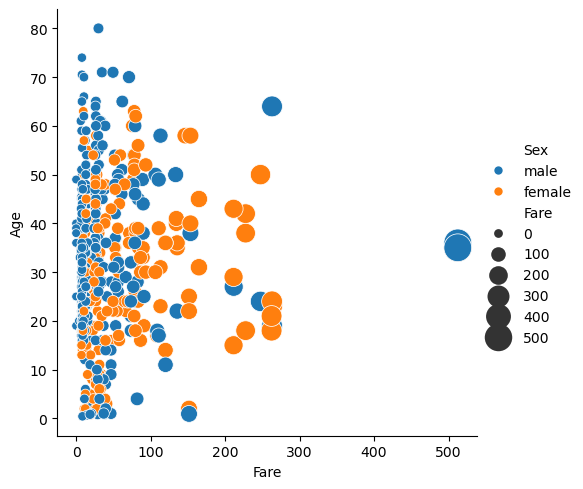

In [95]:
sns.relplot(x='Fare', y='Age', hue='Sex',
            data=data, size="Fare", sizes=(40, 400))

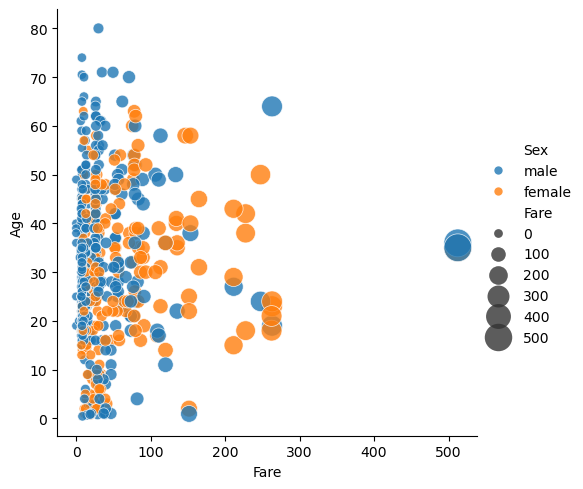

In [98]:
sns.relplot(x='Fare', y='Age', hue='Sex', data=data, size="Fare", sizes=(40, 400),
            alpha=0.8)

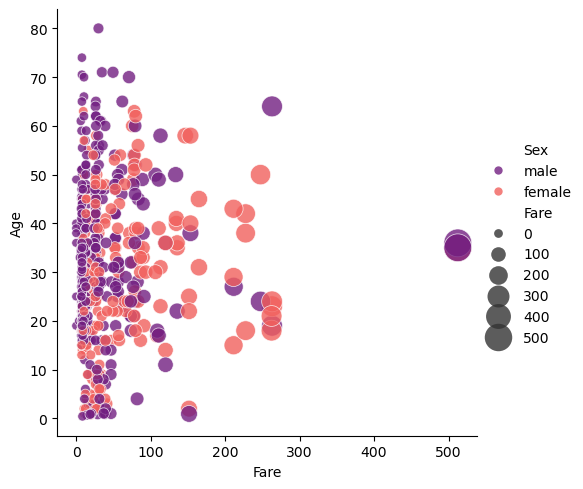

In [100]:
sns.relplot(x='Fare', y='Age', hue='Sex', data=data, size="Fare", sizes=(40, 400),
            alpha=0.8, palette='magma')
plt.show()

### scatterplot


<function matplotlib.pyplot.show(close=None, block=None)>

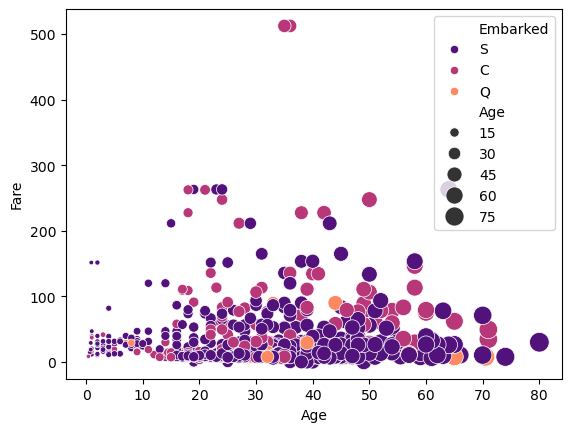

In [107]:
sns.scatterplot(x='Age', y="Fare", hue='Embarked', size="Age", palette='magma',
                data=data, sizes=(10, 200))
plt.show

### pairplot


### jointplot tipo "kde"


### jointplot tipo "reg"


### kdeplot


### catplot do tipo "count"


### heatmap corr()


### plot


### linspace


### normal


Fontes:

- https://matplotlib.org/gallery/index.html
- https://seaborn.pydata.org/examples/index.html
- https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
- https://matplotlib.org/tutorials/colors/colormaps.html
